#### IBM Qiskit Notes - Single Systems

In [1]:
# Qiskit libraries

from qiskit import QuantumCircuit

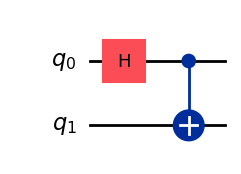

In [2]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

In [3]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

display(u.draw("latex"))
display(v.draw("text"))
display(w.draw("text"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

[0.33333333+0.j,0.66666667+0.j]

In [4]:
display(w.is_valid())

False

In [5]:
v.measure()


('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

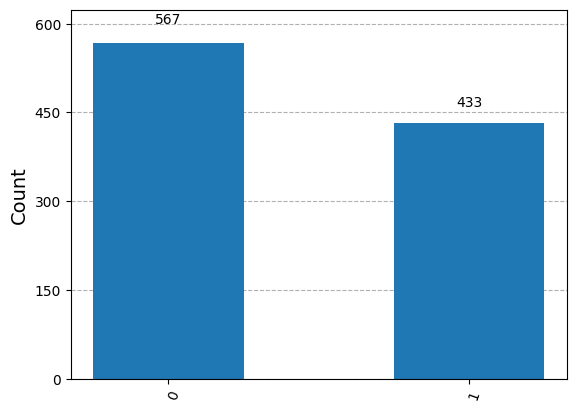

In [6]:
from qiskit.visualization import plot_histogram
statistics = v.sample_counts(1000) # 1000 measurements
plot_histogram(statistics)

In [7]:
v = Statevector([(1+2.0j) / 3, -2/3])
v.draw("latex")

<IPython.core.display.Latex object>

In [8]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

In [9]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])

v = Statevector([1, 0])

v = v.evolve(X)

v.draw("text")

[0.+0.j,1.+0.j]

In [10]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

#### Other Exercises

In [11]:
# Qiskit and external libraries

import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import HGate, XGate, CXGate, TGate, PhaseGate

from qiskit import *
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

import matplotlib.pyplot as plt

In [12]:
# General operations for the state vector |Psi>

# Initial state vector |Psi> as numpy array
# State vector Psi = |01>, change state vector as desired

#psi = np.array([1/4, 1/2, 1/np.sqrt(2), np.sqrt(3)/4], dtype=complex)  # |01> in the computational basis
psi = np.array([0, 1/np.sqrt(2), -1/np.sqrt(2), 0], dtype=complex)

# Quantum gates
H = Operator(HGate()).data  # 2x2 matrix for Hadamard gate # Hadamard (H)
X = Operator(XGate()).data  # 2x2 matrix for Pauli-X gate # Pauli-X (X)

I = np.array([[1, 0], [0, 1]])

# Tensor product
H_tensor_X = np.kron(H, X)

# (H ⊗ X) operator to state vector |Psi>
resulting_state = np.dot(H_tensor_X, psi)

# Results
print("The resulting state vector after applying (H ⊗ X) to |Psi> is:")
print(resulting_state)
print(H_tensor_X)

#CNOT = Operator(CXGate())
#P = Operator(PhaseGate(np.pi)) # Check Theta
#print(CNOT)

The resulting state vector after applying (H ⊗ X) to |Psi> is:
[ 0.5+0.j -0.5+0.j  0.5+0.j  0.5+0.j]
[[ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.70710678+0.j]
 [ 0.70710678+0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j -0.        +0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.        +0.j -0.70710678+0.j -0.        +0.j]]


In [14]:
# Comparisson of built-in Toffoli and decomposed Toffoli
# Exercise 4.23 from "Introduction to Classical and Quantum Computing", Thomas G. Wang (2022)

# Decomposed Toffoli Circuit (Clifford+T decomposition)
def decomposed_toffoli():
    qc = QuantumCircuit(3)

    qc.h(0)
    qc.cx(1, 0)
    qc.tdg(0)
    qc.cx(2, 0)
    qc.t(0)
    qc.cx(1, 0)
    qc.tdg(0)
    qc.cx(2, 0)

    qc.barrier()

    qc.t(0)
    qc.tdg(1)
    qc.h(0)
    qc.cx(2, 1)
    qc.tdg(1)
    qc.cx(2, 1)
    qc.s(1)
    qc.t(2)

    return qc

# Built-in Toffoli Circuit
def built_in_toffoli():
    qc = QuantumCircuit(3)
    # Apply the Toffoli (CCX) gate
    qc.ccx(0, 1, 2)

    return qc


# Comparison
def compare_toffoli_circuits():
    # Input state
    input_state = QuantumCircuit(3)
    input_state.z(0)  # Set qubit 0 to |1>
    input_state.z(1)  # Set qubit 1 to |1>

    # Copies of input state to use in both circuits
    qc_decomposed = input_state.compose(decomposed_toffoli())
    qc_builtin = input_state.compose(built_in_toffoli())

    # Measurements of both circuits
    qc_decomposed.measure_all()
    qc_builtin.measure_all()

    # Simulation
    simulator = AerSimulator()

    # Decomposed Toffoli
    result_decomposed = simulator.run(qc_decomposed).result()
    counts_decomposed = result_decomposed.get_counts()

    # Built-in Toffoli
    result_builtin = simulator.run(qc_builtin).result()
    counts_builtin = result_builtin.get_counts()


    # Plotss
    print("Decomposed Toffoli Circuit:")
    print(qc_decomposed)
    qc_decomposed.draw('mpl')
    plt.show()

    print("Built-in Toffoli Circuit:")
    print(qc_builtin)
    qc_builtin.draw('mpl')
    plt.show()

    print("Measurement Results:")
    plot_histogram([counts_decomposed, counts_builtin],
                   legend=['Decomposed Toffoli', 'Built-in Toffoli'])
    plt.show()


# Run comparison
compare_toffoli_circuits()

Decomposed Toffoli Circuit:
        ┌───┐┌───┐┌───┐┌─────┐┌───┐┌───┐┌───┐┌─────┐┌───┐ ░  ┌───┐ ┌───┐       »
   q_0: ┤ Z ├┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├─░──┤ T ├─┤ H ├───────»
        ├───┤└───┘└─┬─┘└─────┘└─┬─┘└───┘└─┬─┘└─────┘└─┬─┘ ░ ┌┴───┴┐├───┤┌─────┐»
   q_1: ┤ Z ├───────■───────────┼─────────■───────────┼───░─┤ Tdg ├┤ X ├┤ Tdg ├»
        └───┘                   │                     │   ░ └─────┘└─┬─┘└─────┘»
   q_2: ────────────────────────■─────────────────────■───░──────────■─────────»
                                                          ░                    »
meas: 3/═══════════════════════════════════════════════════════════════════════»
                                                                               »
«                   ░ ┌─┐      
«   q_0: ───────────░─┤M├──────
«        ┌───┐┌───┐ ░ └╥┘┌─┐   
«   q_1: ┤ X ├┤ S ├─░──╫─┤M├───
«        └─┬─┘├───┤ ░  ║ └╥┘┌─┐
«   q_2: ──■──┤ T ├─░──╫──╫─┤M├
«             └───┘ ░  ║  ║ └╥┘
«meas: 3/══════════